# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


#### 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Validation:   
- Describe validation and cleaning steps for every column in the data 

In [2]:
# Load the data
df = pd.read_csv('recipe_site_traffic_2212.csv')

# Inspect the data
print(df.head())

# Handling missing values
df.fillna(value=np.nan, inplace=True)

# Convert 'servings' to numeric data type
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')

# Handle 'high_traffic' column (assuming NA means not high traffic)
df['high_traffic'].fillna('Not High', inplace=True)

# Inspect the cleaned data
print(df.head())

# Save the cleaned data
df.to_csv('cleaned_recipe_site_traffic.csv', index=False)


   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  
   recipe  calories  carbohydrate  sugar  protein   category  servings  \
0       1       NaN           NaN    NaN      NaN       Pork       6.0   
1       2     35.48         38.56   0.66     0.92     Potato       4.0   
2       3    914.28         42.68   3.09     2.88  Breakfast       1.0   
3       4     97.03         30.56  38.63     0.02  Beverages       4.0   
4       5     27.05          1.85   0.80     0.53  Beverages       4.0   

  high_traffic

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\1549587316.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['high_traffic'].fillna('Not High', inplace=True)


### Exploratory Analysis:  
- Include two different graphics showing single variables only to demonstrate the characteristics of data  
- Include at least one graphic showing two or more variables to represent the relationship between features
- Describe your findings

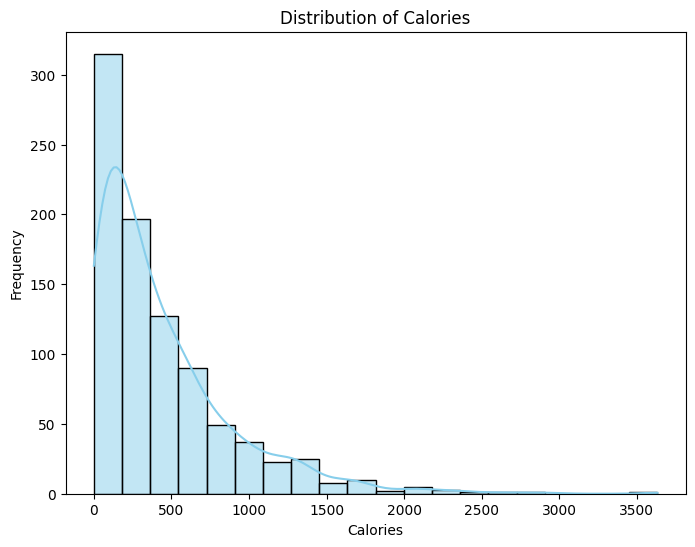

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\1736952074.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='pastel')


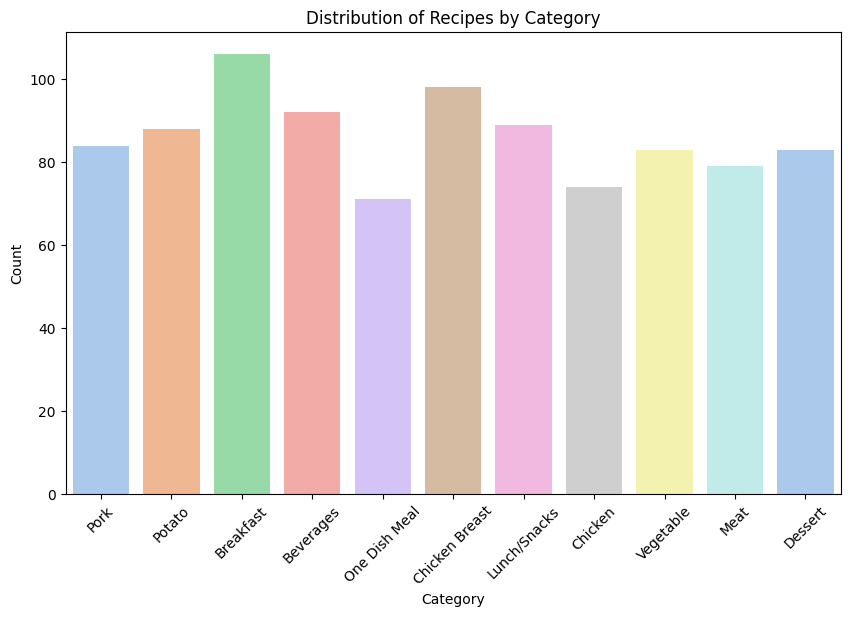

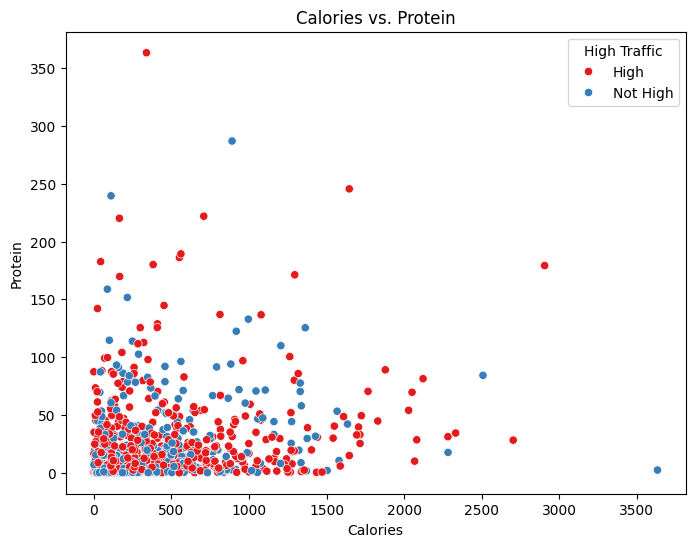

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\1736952074.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='calories', palette='pastel')


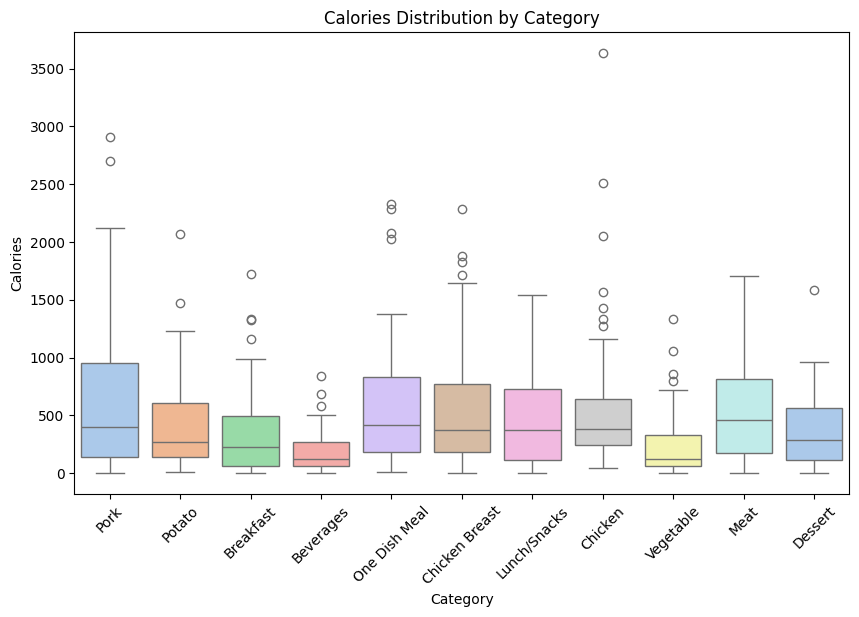

In [8]:
# Single Variable Analysis
# Histogram of calories
plt.figure(figsize=(8, 6))
sns.histplot(df['calories'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Bar plot of category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', palette='pastel')
plt.title('Distribution of Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship Between Features
# Scatter plot of calories vs. protein
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='protein', hue='high_traffic', palette='Set1')
plt.title('Calories vs. Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

# Box plot of calories by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='calories', palette='pastel')
plt.title('Calories Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

#### Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models

Given the objective to predict which recipes will be popular 80% of the time while minimizing the chance of showing unpopular recipes, we can frame this as a classification problem where we classify recipes as either popular or unpopular based on a certain threshold of popularity.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Define target variable: Popular (1) if high_traffic is "High", else Unpopular (0)
df['popularity'] = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

# Features and target
X = df.drop(columns=['high_traffic', 'popularity'])  # Features
y = df['popularity']  # Target

# One-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[['category']])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['category']), index=X.index)
X = pd.concat([X.drop(columns=['category']), X_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


#### Model Evaluation
  - Describe the performance of the two models based on an appropriate metric


In [22]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.71
Precision: 0.72
Recall: 0.82
F1-score: 0.77


#### Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach

  By evaluating the model's performance using these business metrics, we can assess how well it aligns with the business objectives. If the model achieves high precision, recall, and F1-score while minimizing FPR and NPV, it indicates that it can effectively predict popular recipes while minimizing the chance of showing unpopular ones.

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
false_positive_rate = conf_matrix[0,1] / (conf_matrix[0,0] + conf_matrix[0,1])
positive_prediction_value = precision
negative_prediction_value = conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])

# Print Business metrics
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Positive Prediction Value: {precision:.2f}")
print(f"Negative Prediction Value: {negative_prediction_value:.2f}")

False Positive Rate: 0.47
Positive Prediction Value: 0.72
Negative Prediction Value: 0.82


#### Final summary including recommendations that the business should undertake



##### ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation